Considere un motro de retencion de clientes, queremos identificar la cantidad de retiros de clientes basado en:
* Cantidad de quejas reportadas [0,1000]
* Cantidad de compras ejecutadas [0,500]
Los retiros de clientes asociados a estas variables se comportan asi: (una grafica que no puedo hacer aca)


In [13]:
#Tratamiento de datos
import numpy as np
#Motor de inferencia
import skfuzzy
from skfuzzy import control as ctrl
from scipy.stats import linregress
#Graficos
import matplotlib.pyplot as plt

#Advertencias
import warnings
warnings.filterwarnings("ignore")


# 1 Visualizacion de los conjuntos borrosos de los antecedentes

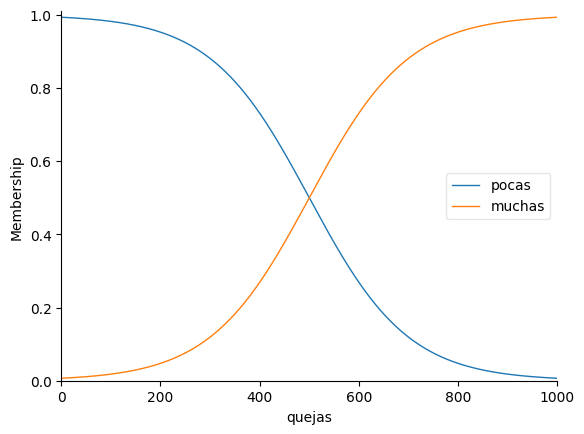

In [14]:
#Cantidad de quejas
#Universo de discurso
quejas = ctrl.Antecedent(np.arange(0,1001,1), "quejas")
quejas["pocas"] = skfuzzy.sigmf(quejas.universe, 500,-0.01)
quejas["muchas"] = skfuzzy.sigmf(quejas.universe, 500, 0.01)
quejas.view()

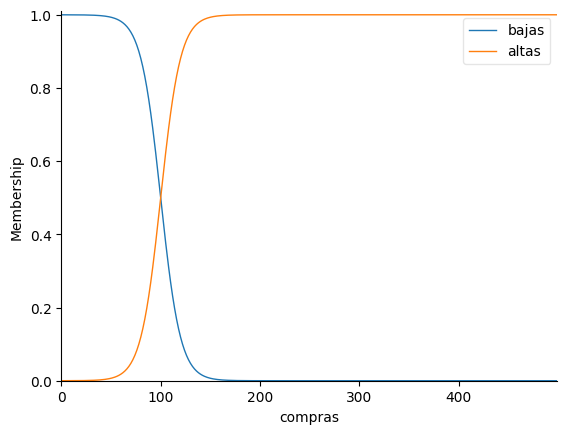

In [15]:
#Monto de compras
#Universo de discurso
compras = ctrl.Antecedent(np.arange(0,500,1), "compras")
compras["bajas"] = skfuzzy.sigmf(compras.universe, 100, -0.1)
compras["altas"] = skfuzzy.sigmf(compras.universe, 100, 0.1)
compras.view()


# 2 Declarar las variables para el SIB TSK

In [16]:
# Antecedentes
quejas = np.arange(0,1001,1)
quejas_pocas = skfuzzy.sigmf(quejas, 500, -0.01)
quejas_muchas = skfuzzy.sigmf(quejas, 500,0.01)

compras = np.arange(0,501,1)
compras_altas = skfuzzy.sigmf(compras, 100,0.1)
compras_bajas = skfuzzy.sigmf(compras, 100,-0.1)

In [17]:
#Funciones del consecuente
#Pendiente m1 = 0.04
# Pendiente m2 = 0.46
# m3 = -2
# m4 = -0.125
# r1=0.04Q (quejas)
# r2 = 0.46Q-210
# r3 = -2C + 250 (compras)
# r4 = -0.125C +62.5
# Esto es mezclar las rectas
def y1(Q,C):
    #r1+r3
    return 0.04*Q-2*C+250
def y2(Q,C):
    #r1+r4
    return 0.04*Q-0.125*C + 62.5
def y3(Q,C):
    #r2+r3
    return 0.46*Q-2*C+40
def y4(Q,C):
    #r2+r4
    return 0.46*Q -0.125*C-147.5

# 3. Defuzzificacion

In [18]:
def resultado(num1, num2, num3, num4, Q, C):
    yr1 = y1(Q,C)
    yr2 = y2(Q,C)
    yr3 = y3(Q,C)
    yr4 = y4(Q,C)
    num = (mu1*yr1) + (mu2*yr2) +(mu3*yr3) +(mu4*yr4)
    den = mu1+mu2+mu3+mu4
    return num/den
    
    

# 4 Calcular las pertenencias

In [19]:
mu1 = min(skfuzzy.interp_membership(quejas, quejas_pocas, 400),skfuzzy.interp_membership(compras,compras_bajas,70))
mu1

0.7310585786300049

In [20]:
mu2 = min(skfuzzy.interp_membership(quejas, quejas_pocas, 400),skfuzzy.interp_membership(compras,compras_altas,70))
mu2

0.04742587317756678

In [21]:
mu3 = min(skfuzzy.interp_membership(quejas, quejas_muchas, 400),skfuzzy.interp_membership(compras,compras_bajas,70))
mu3

0.2689414213699951

In [22]:
mu4 = min(skfuzzy.interp_membership(quejas, quejas_muchas, 400),skfuzzy.interp_membership(compras,compras_altas,70))
mu4

0.04742587317756678

In [23]:
resultado(mu1,mu2,mu3,mu4, 400, 70)

108.99053989229951